In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [55]:
import sqlite3

con = sqlite3.connect("../db.sqlite3")

df_orderitem = pd.read_sql(
    "SELECT * FROM restaurant_orderitem", con, index_col="id"
)
df_order = pd.read_sql("SELECT * FROM restaurant_order", con, index_col="id")
df_product = pd.read_sql(
    "SELECT * FROM restaurant_product", con, index_col="id"
)

df = (
    df_orderitem.join(df_order, on="order_id")
    .join(df_product, on="product_id")
    .drop(["order_id", "product_id"], axis=1)
)
df.to_csv()

con.close()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

array([<Axes: ylabel='Quantity'>], dtype=object)

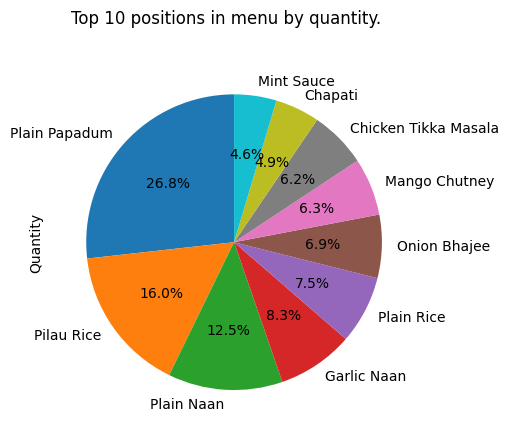

In [108]:
(
    df[["name", "quantity"]]
    .groupby("name")
    .sum()
    .sort_values("quantity", ascending=False)
    .head(10)
).plot(
    kind="pie",
    title="Top 10 positions in menu by quantity",
    startangle=90,
    autopct="%1.1f%%",
    subplots=True,
    legend=False,
    ylabel="Quantity",
)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

array([<Axes: ylabel='Profit per item'>], dtype=object)

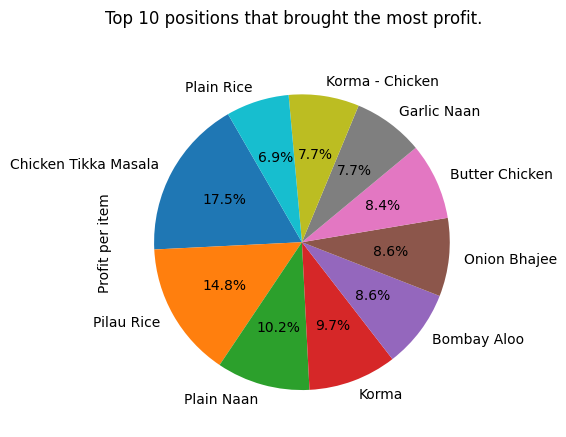

In [125]:
df["item price"] = df["quantity"] * df["price"]
(
    df[["name", "item price"]]
    .groupby("name")
    .sum()
    .sort_values("item price", ascending=False)
    .head(10)
).plot(
    kind="pie",
    title="Top 10 positions that brought the most profit",
    startangle=120,
    autopct="%1.1f%%",
    subplots=True,
    legend=False,
    ylabel="Profit per item",
)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: title={'center': 'Profit by Order Hour'}, xlabel='Order Hour'>

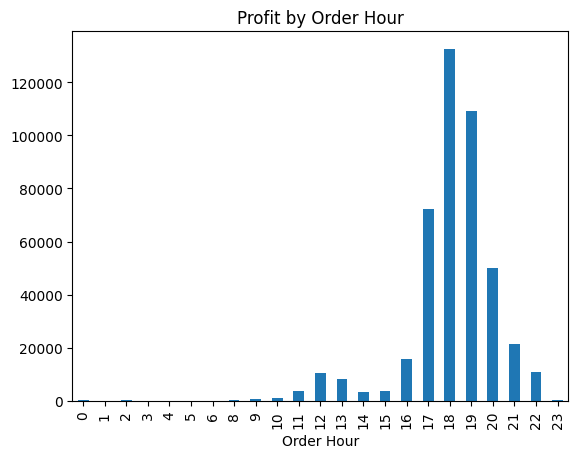

In [163]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df[["hour", "item price"]].groupby("hour").sum().plot(
    kind="bar",
    title="Profit by Order Hour",
    legend=False,
    xlabel="Order Hour",
)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: title={'center': 'Profit by Order Day Of The Week'}, xlabel='Order Day Of The Week'>

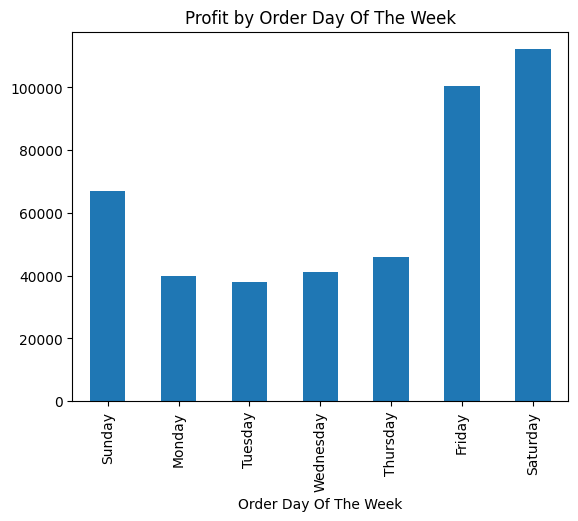

In [173]:
df["day of week"] = df["datetime"].dt.day_name()
df[["day of week", "item price"]].groupby("day of week", sort=False).sum()[::-1].plot(
    kind="bar",
    title="Profit by Day Of The Week",
    legend=False,
    xlabel="Order Day Of The Week",
)